# **Milestone 1**

##**Context**
 
 - Why is this problem important to solve?
 
- Global warming is one of the foremost problems that humanity needs to solve to ensure our survival for the future. The accumulation of greenhouse gases is one of the primary contributors and CO2 is one of the biggest contributors to this greenhouse effect. Buring of the various sources of energy that can generate the electricity is the primary source of CO2 emissions.  How to balance the reduction of carbon emission and affordable electricity production is crucial for controlling the catastrophi ceffects of global warming. Forecasting CO2 emissions can make an impact on this crucial decision-making.

##**Objective**

 - What is the intended goal?

 - The objective of this problem is to build a time series model using the AR, MA, ARMA & ARIMA models that can forecast the CO2 emissions value for natural gas (NNEIEUS) fuel type for the next 12 months and propose certain measures that can be adopted as policies to reduce these emissions.

##**Key questions**

- What are the key questions that need to be answered?
 

1. What are the different variables that influence C02 emissions?
2. Which factor affects the C02 emission the most? What could be plausible reasons for that?
3. What are your recommendations to key decision-maker on balancing the reduction of carbon emission and affordable electricity production?

##**Problem Formulation**:

- What is it that we are trying to solve using data science?
 - Trying to find patterns connected to large amount of data that are connected to business insights.

##**Attributes Information:**

This datset is the past monthly data of Carbon dioxide emissions from electricity generation from the US Energy Information Administration categorized by fuel type such as Coal, Natural gas etc.

**MSN:-** Reference to Mnemonic Series Names (U.S. Energy Information Administration Nomenclature)

**YYYYMM:-** The month of the year on which these emissions were observed

**Value:-** Amount of CO2 Emissions in Million Metric Tons of Carbon Dioxide

**Description:-**  Different category of electricity production through which carbon is emissioned.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###**Loading the libraries**

In [133]:
# Uncomment to upgrade statsmodels
!pip install statsmodels --upgrade

In [154]:
#Import basic libraries
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**Loading the data**

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
df = pd.read_excel('/content/drive/My Drive/MER_T12_06.xlsx')
df.head()

,MSN,YYYYMM,Value,Description
0,CLEIEUS,197301,72.076,Coal Electric Power Sector CO2 Emissions
1,CLEIEUS,197302,64.442,Coal Electric Power Sector CO2 Emissions
2,CLEIEUS,197303,64.084,Coal Electric Power Sector CO2 Emissions
3,CLEIEUS,197304,60.842,Coal Electric Power Sector CO2 Emissions
4,CLEIEUS,197305,61.798,Coal Electric Power Sector CO2 Emissions


In [231]:
#to ignore warnings
import warnings
import itertools
warnings.filterwarnings("ignore")

In [232]:
#conversion of "YYYYMM" columnn into standard datetime format & making it as index
# We are using errors=’coerce’. It will replace all non-numeric values with NaN.

dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_excel('/content/drive/My Drive/MER_T12_06.xlsx', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head(15)

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions
1973-06-01,CLEIEUS,66.538,Coal Electric Power Sector CO2 Emissions
1973-07-01,CLEIEUS,72.626,Coal Electric Power Sector CO2 Emissions
1973-08-01,CLEIEUS,75.181,Coal Electric Power Sector CO2 Emissions
1973-09-01,CLEIEUS,68.397,Coal Electric Power Sector CO2 Emissions


**The arguments can be explained as:**

- **parse_dates:** This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
- **index_col:** This is a key that forces pandas to use the date time column as index.
- **date_parser:** Converts an input string into datetime variable.

- Let us first identify and **drop the non datetimeindex** rows. First, let's convert the index to datetime, coerce errors, and filter NaT

In [233]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head()

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions


In [234]:
#Check the datatypes of each column. Hint: Use dtypes method
print(ts.dtypes)

MSN            object
Value          object
Description    object
dtype: object


In [235]:
#convert the emision value into numeric value
ts["Value"] = pd.to_numeric(ts["Value"], errors='coerce')

In [236]:
#Check total number of missing values of each column. Hint: Use isnull() method
ts.isna().sum()

MSN              0
Value          384
Description      0
dtype: int64

In [237]:
#Drop the missing value using dropna(inplace = True)
ts.dropna(inplace = True)

###**Dataset visualization**

- The dataset has 8 energy sources of CO2 emission. 
- Group the CO2 Emission dataset based on the type of energy source.

In [259]:
ts_per_source = ts.groupby('Description')
ts_per_source.head(5)

,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions
1973-01-01,NNEIEUS,12.175,Natural Gas Electric Power Sector CO2 Emissions
1973-02-01,NNEIEUS,11.708,Natural Gas Electric Power Sector CO2 Emissions
1973-03-01,NNEIEUS,13.994,Natural Gas Electric Power Sector CO2 Emissions
1973-04-01,NNEIEUS,14.627,Natural Gas Electric Power Sector CO2 Emissions


####**Visualize the dependency of the emission in the power generation with time.**

In [254]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

In [287]:
cols_code=ts.Description.unique()
cols_code

array(['Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

In [289]:
cols_re_ordered = ['Coal', 'Natural Gas', 'Distillate Fuel', 'Petroleum Coke', 'Residual Fuel Oil', 'Petroleum', 'Geothermal Energy', 'Non-Biomass Waste', 
                   'Total Emissions']

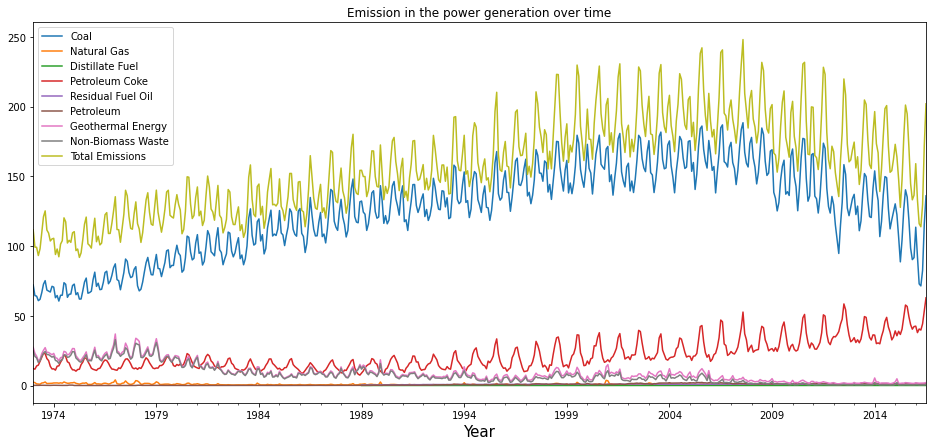

In [290]:
fix, ax = plt.subplots(figsize=(16,7))
for label, df in ts.groupby('Description'):
    df.Value.plot()
plt.legend(cols_re_ordered)
plt.title('Emission in the power generation over time')
plt.xlabel('Year', fontsize=15)
plt.show()


In [ ]:
fix, ax = plt.subplots(figsize=(16,7))
cols_code=ts.Description.unique()
for label, df in ts.groupby('Description'):
    df.Value.plot()
plt.legend(cols_code)
plt.title('Emission in the power generation over time')
plt.xlabel('Year', fontsize=15)
plt.show()

- **Observations and Insights: _____**
-	Total Emissions hit peak around year 2009. 
-	Overall, the amount of CO2 emissions from source of Coal Electric Power is very high and dominant compared to the other 7 sources. Clearly it's the primary source of carbon emission. But the the amount of CO2 emissions from Coal Electric Power has been going down after year 2009.
-	The amount of CO2 emissions from Petroleum Coke Electric Power and the other 6 sources were at the very close level before the year 2000. Starting from year 2000, for some reason the amount of CO2 emissions from Petroleum Coke has been increased. The amount of CO2 emissions from the other 6 sources has been going down and especailly after year 2017 have decreased significantly.
-	The above plot also shows the amount of CO2 emissions from the two sources of Coal Electric Power and Petroleum Coke are at very close level since year 2016. It suggests the Coal Electric Power and Petroleum Coke are the two primary source of carbon emissions since 2016 till now.
-	For each trend line has obvious peaks and minimums for cetern time periods, it suggests it has Seasonality trend that repeats with respect to timing. It means there are some underlying parterns under the trends for each type of energy source can be explorated.



#### **Visualize the trend of CO2 emission from each energy source individually**

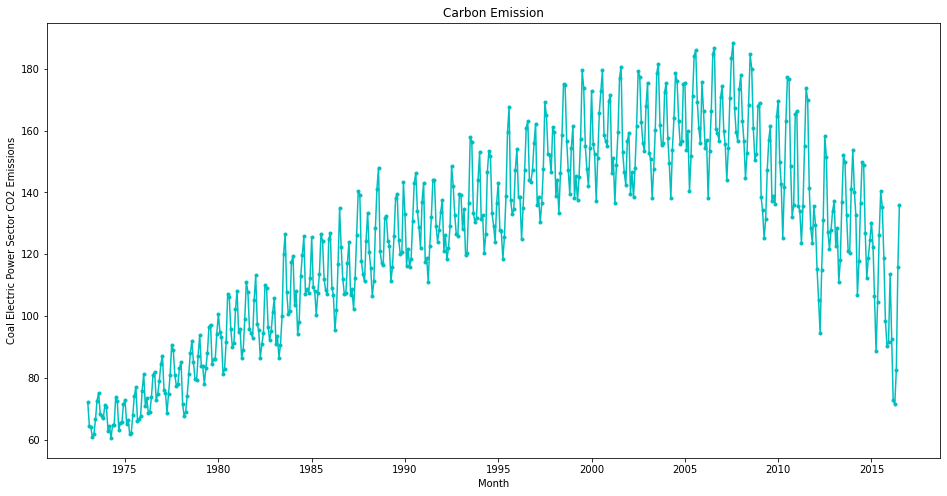

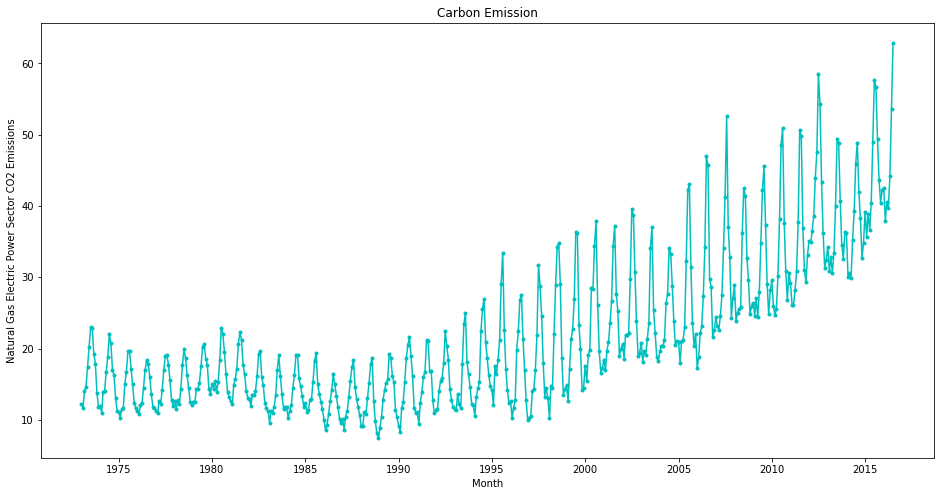

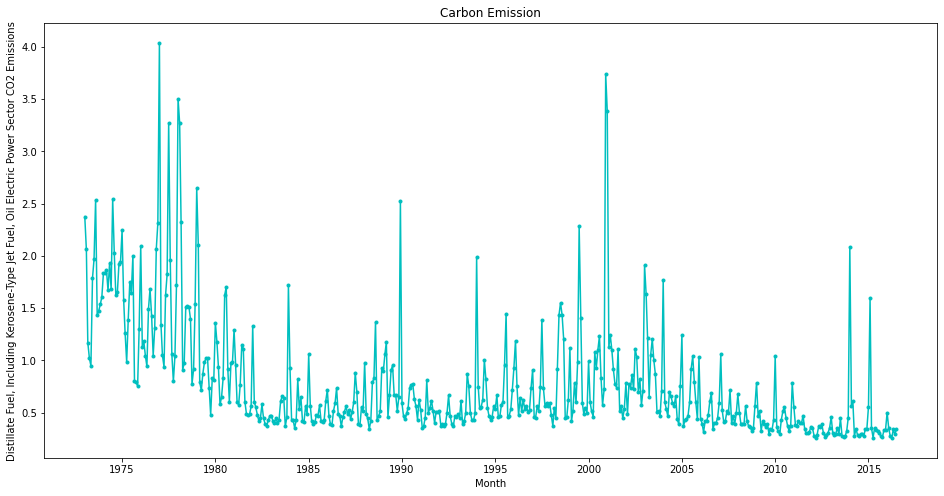

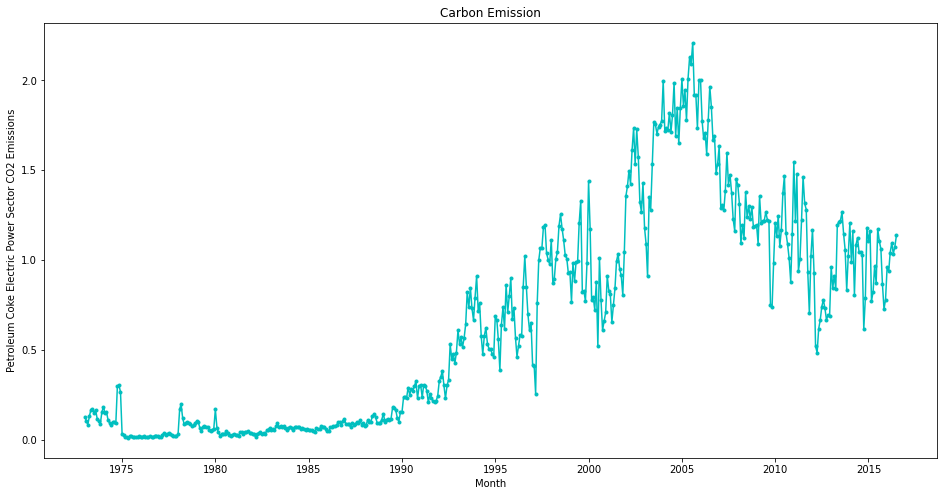

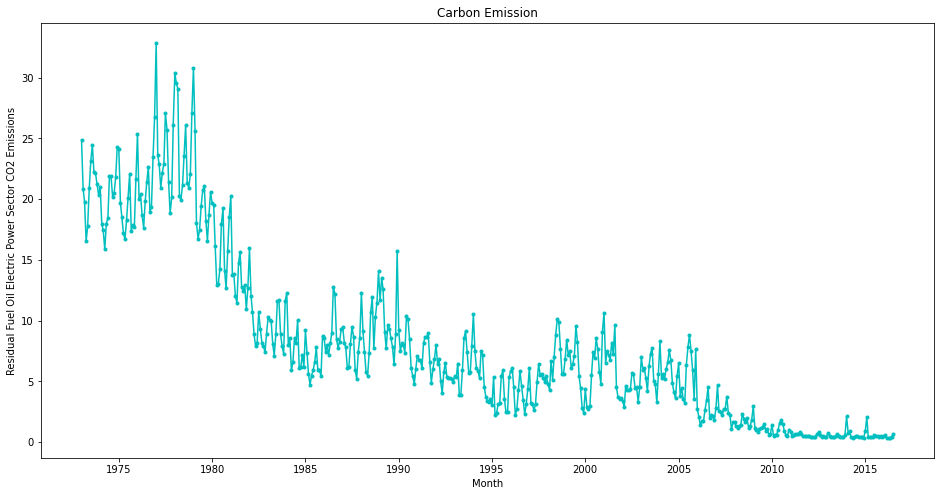

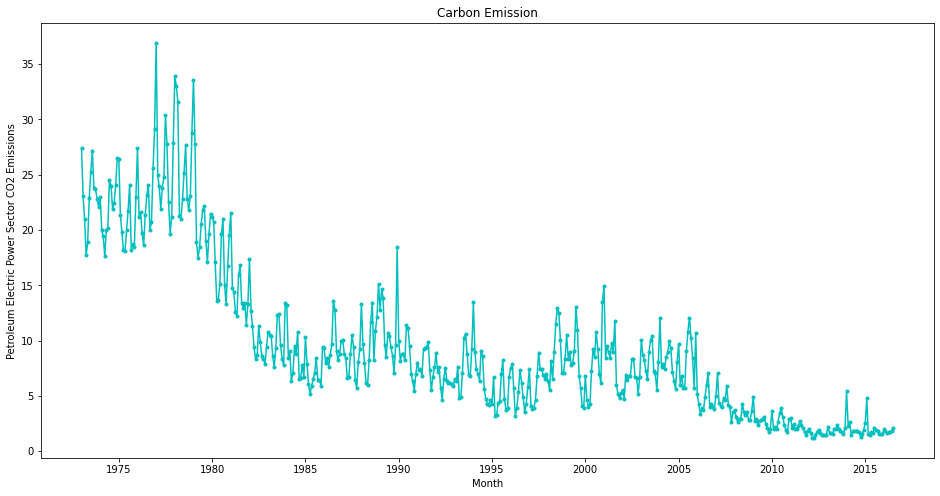

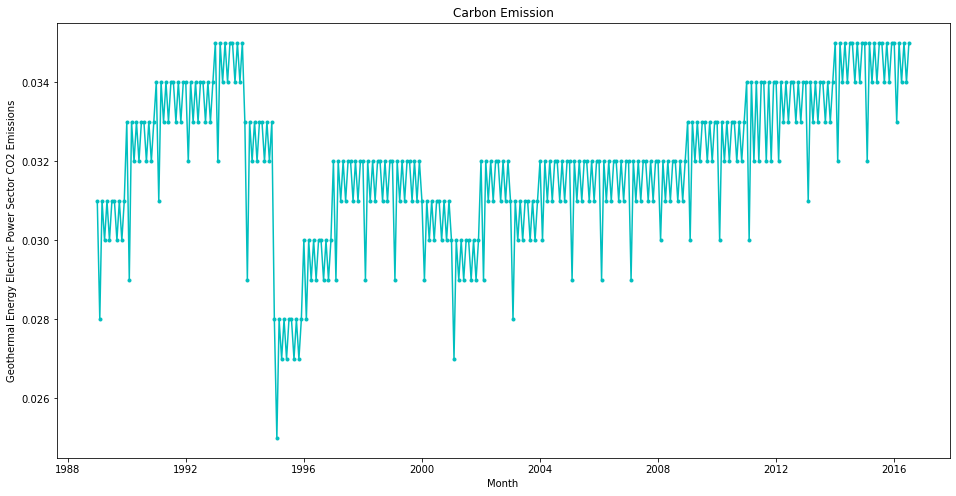

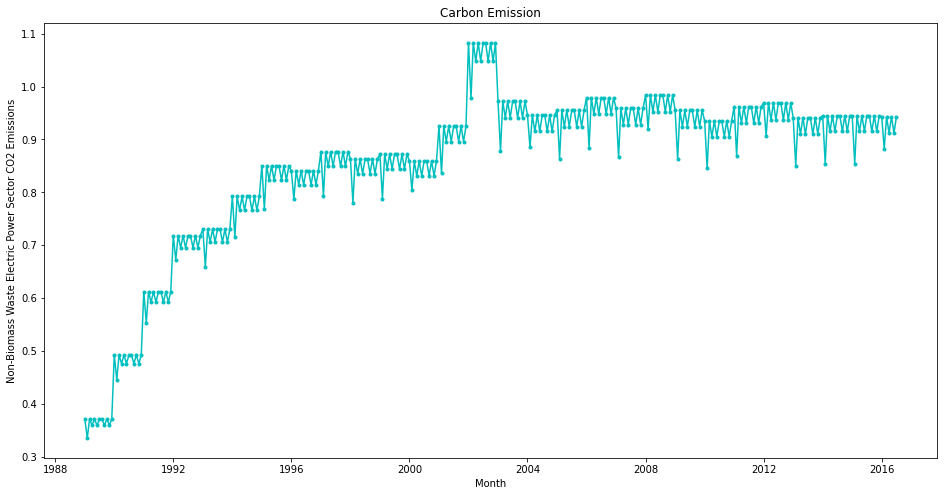

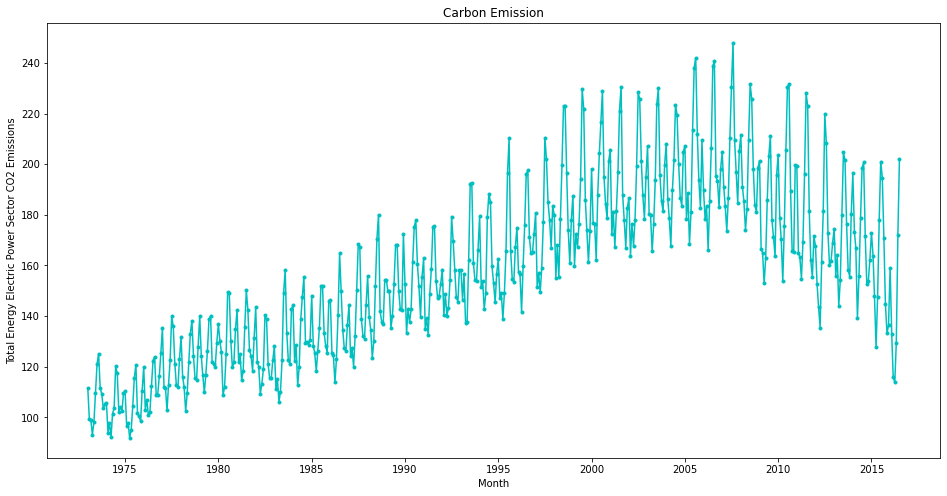

In [18]:
###Code here
ts_grouped = ts.groupby('Description')
cols_code=ts.Description.unique()
cols_code
for col in cols_code:
    plt.figure(figsize=(16,8))
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.title('Carbon Emission')
    plt.plot(ts_grouped.get_group(col).index,ts_grouped.get_group(col).Value,color = 'c', marker='.')
    plt.show()

#### **Observations and Insights: ______**
-	From the visualization, it is clearly that the time series has a deterministic trend in CO2 emissions amount from the sources of Coal Electric Power, Natural Gas Electric, Petroleum Coke Electric, Residual Fuel Oil, Petroleum Electric Power, Non-Biomass Waste Electric Power, Total Emissions.
-	The CO2 emissions amount from the sources of Geothermal Energy Electric and Distillate Fuel hasn’t shown very clear trend over the much to do with time But it shows the seasonality trend that repeats with respect to timing.
-	We can see that the series has an upward trend with some seasonality in the data sources of Coal Electric Power, Natural Gas Electric, Petroleum Coke Electric, Non-Biomass Waste Electric Power and Total Emissions. 
-	The value of emissions from the source of Petroleum Coke has increased tremendously after the year 1990, hit the peak around year 2006 and still has kept at very high level even it has been decreasing. We may need the log transform to make the time-series from Petroleum Coke stationary.
-	The CO2 emissions amount from the sources of Non-Biomass Waste Electric Power had been going up before the year 1996 and has been keeping at constant value since 1996.
-	Oppositely, we can see the series has a downward trend with some seasonality in the data sources of Residual Fuel Oil and Petroleum Electric Power. The value of emissions from Residual Fuel Oil has decreased tremendously around the year 1980.  The value of emissions from Petroleum Electric Power has decreased tremendously around the year 1980.  It suggests there may be some similar factors influenced that caused the value of emissions decreased tremendously from Residual Fuel Oil and Petroleum Electric Power.


####**Bar chart of CO2 Emissions per energy source**

In [227]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values().to_frame()
CO2_per_source.head(9)

,Value
Description,
Geothermal Energy Electric Power Sector CO2 Emissions,10.563
Non-Biomass Waste Electric Power Sector CO2 Emissions,281.367
Petroleum Coke Electric Power Sector CO2 Emissions,338.785
"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",404.887
Residual Fuel Oil Electric Power Sector CO2 Emissions,4239.312
Petroleum Electric Power Sector CO2 Emissions,4982.993
Natural Gas Electric Power Sector CO2 Emissions,11295.359
Coal Electric Power Sector CO2 Emissions,65782.393
Total Energy Electric Power Sector CO2 Emissions,82352.676


In [274]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']
cols_1 = ['Coal', 'Distillate Fuel', 'Geothermal Energy', 'Natural Gas', 'Non-Biomass Waste', 'Petroleum Coke', 'Petroleum', 'Residual Fuel Oil', 'Total Emissions']
CO2_per_source["Energy_Type"] = cols_1
CO2_per_source.head()

,Value,Energy_Type
Description,,
Geothermal Energy Electric Power Sector CO2 Emissions,10.563,Coal
Non-Biomass Waste Electric Power Sector CO2 Emissions,281.367,Distillate Fuel
Petroleum Coke Electric Power Sector CO2 Emissions,338.785,Geothermal Energy
"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",404.887,Natural Gas
Residual Fuel Oil Electric Power Sector CO2 Emissions,4239.312,Non-Biomass Waste


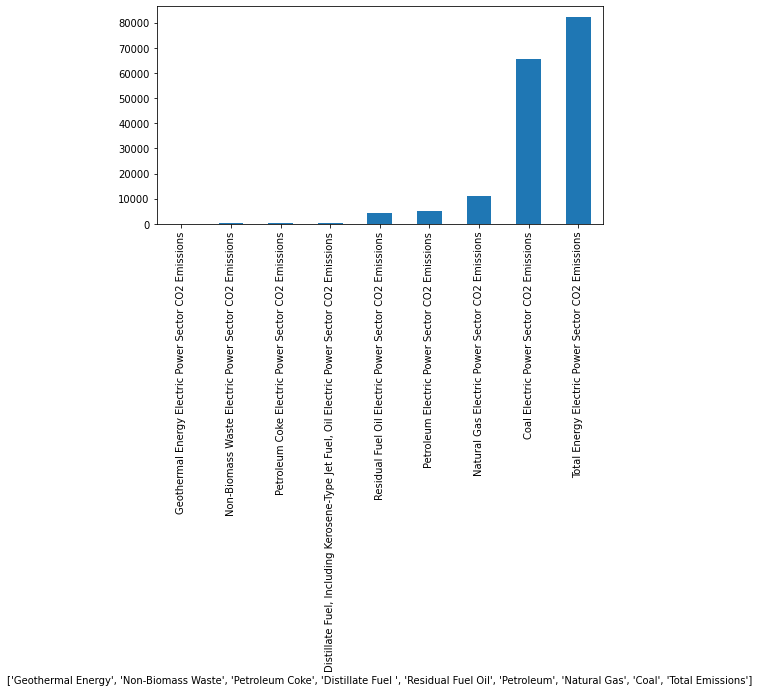

In [275]:
##Code here
CO2_per_source.Value.plot(kind='bar', figsize=(8,4))
plt.xlabel(cols)
plt.show()

####**For developing the time series model and forcasting, use the natural gas CO2 emission from the electirical power generation**


In [247]:
Emissions = ts.iloc[:,1:] # Monthly total emissions (mte)
Emissions = Emissions.groupby(['Description', pd.Grouper(freq="M")])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)Emissions.head()
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

####**Observations & insights: _____**
-	From the above the caculation of monthly total emissions, it is clearly that the time series has a deterministic trend in the overal CO2 emissions generated from the electirical power.
-	The overall trend between the emissions value and time is going up even if for some month it may go down.
-	There should be clear pattern between variables and time. We will need to build different models to find the underlying pattern in order to predict the trende in next 12 month.



##**Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- Calculating the rolling mean, Augmented Dickey-Fuller (ADF) Test, Log Transformation, By differencing the series (lagged series)
- AR, MA, ARMA, and ARIMA models.





- **Overall solution design -** What is the potential solution design?
  1.	Splitting the dataset to train data and test data
  2.	The first task is to make the time-series stationary.
  3.	Decompose the time series components into Trend, Seasonality and Residual.
  4.	Then plot the auto-correlation function and partial auto-correlation function.
  5.	Estimate the order of p and q. 
  6.	Get p and q values for AR, MA, ARMA, and ARIMA models.
  7.	Select the best model with the least RMSE or lowest AIC.
  8.	Use the inverse transformation to get back the original values.
  9.	Forecast the values for the next 12 months and comparing it with the test data.






- **Measures of success -** What are the key measures of success?
- RMSE, BIC, AIC